In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score
from catboost import CatBoostRegressor
import math


pd.options.mode.chained_assignment = None

In [2]:
data=pd.read_csv("__train__.csv")


In [3]:
data.isnull().sum()

Field           0
Year            0
Cluster         0
Area            0
Yield           0
               ..
35_week_ndvi    0
36_week_ndvi    0
37_week_ndvi    0
38_week_ndvi    0
39_week_ndvi    0
Length: 162, dtype: int64

In [4]:
data.head()

,Field,Year,Cluster,Area,Yield,Geozone,Predecessor,FAO,N_kg/ga,P_kg/ga,...,30_week_ndvi,31_week_ndvi,32_week_ndvi,33_week_ndvi,34_week_ndvi,35_week_ndvi,36_week_ndvi,37_week_ndvi,38_week_ndvi,39_week_ndvi
0,1310,2019,1,79.263,129.077355,12,0,320.0,222.330633,52.239128,...,0.757000,0.760333,0.69800,0.6610,0.60100,0.538000,0.4710,0.402333,0.347375,0.343
1,1315,2018,1,115.484,190.068235,12,0,360.0,202.932162,34.790209,...,0.734968,0.734000,0.73625,0.7140,0.68300,0.624429,0.5905,0.511000,0.463333,0.410
2,1315,2019,1,83.883,149.674818,12,0,320.0,229.686158,66.645135,...,0.693000,0.664300,0.66600,0.6230,0.57800,0.508000,0.4380,0.366667,0.333125,0.325
3,1312,2018,1,55.964,181.336145,12,0,360.0,209.345544,49.952827,...,0.751783,0.737000,0.73500,0.7095,0.68075,0.646286,0.6115,0.540000,0.476000,0.405
4,1312,2019,1,55.965,148.165017,12,0,320.0,204.983972,51.916963,...,0.735000,0.715300,0.67900,0.6650,0.63000,0.569000,0.5010,0.460714,0.399500,0.387


In [5]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [6]:
data.isnull().sum()

Field                                    0
Year                                     0
Cluster                                  0
Area                                     0
Yield                                    0
Geozone                                  0
Predecessor                              0
FAO                                    790
N_kg/ga                                  0
P_kg/ga                                227
K_kg/ga                                335
5_YEARLY_median_AVERAGE_TEMPERATURE      0
6_YEARLY_median_AVERAGE_TEMPERATURE      0
7_YEARLY_median_AVERAGE_TEMPERATURE      0
8_YEARLY_median_AVERAGE_TEMPERATURE      0
9_YEARLY_median_AVERAGE_TEMPERATURE      0
5_YEARLY_median_EVAPORATION              0
6_YEARLY_median_EVAPORATION              0
7_YEARLY_median_EVAPORATION              0
8_YEARLY_median_EVAPORATION              0
9_YEARLY_median_EVAPORATION              0
5_YEARLY_median_HUMIDITY(%)              0
6_YEARLY_median_HUMIDITY(%)              0
7_YEARLY_me

In [7]:
def get_name_empty_col(_data_):
    list_column=(list(_data_.columns))
    list_empty=[]
    for i in list_column:
        if _data_[i].isnull().sum()!=0:
            list_empty.append([i,_data_[i].isnull().sum()])
    return list_empty

In [8]:
data.shape

(5734, 162)

In [9]:
data_finally=pd.DataFrame()

In [10]:
def input_empty(_data_,i):
    df = pd.DataFrame()
    df = _data_[_data_["Cluster"]==i]
    df["FAO"].fillna(df["FAO"].median(skipna=True),inplace=True)
    df["P_kg/ga"].fillna(df["P_kg/ga"].median(skipna=True),inplace=True)
    df["K_kg/ga"].fillna(df["K_kg/ga"].median(skipna=True),inplace=True)
    if i ==2:
        pass
    else:
        df["Criteria"]=df["Area"]/df["Yield"]
        df=df.drop([df['Criteria'].idxmax(),df['Criteria'].idxmin()])
        df= df.drop(columns=['Criteria'])
    return df

In [11]:
for k in range(7):
    time_data= input_empty(data,k)
    data_finally= data_finally.append(time_data)

In [12]:
data_finally.isnull().sum()

Field                                  0
Year                                   0
Cluster                                0
Area                                   0
Yield                                  0
Geozone                                0
Predecessor                            0
FAO                                    0
N_kg/ga                                0
P_kg/ga                                0
K_kg/ga                                0
5_YEARLY_median_AVERAGE_TEMPERATURE    0
6_YEARLY_median_AVERAGE_TEMPERATURE    0
7_YEARLY_median_AVERAGE_TEMPERATURE    0
8_YEARLY_median_AVERAGE_TEMPERATURE    0
9_YEARLY_median_AVERAGE_TEMPERATURE    0
5_YEARLY_median_EVAPORATION            0
6_YEARLY_median_EVAPORATION            0
7_YEARLY_median_EVAPORATION            0
8_YEARLY_median_EVAPORATION            0
9_YEARLY_median_EVAPORATION            0
5_YEARLY_median_HUMIDITY(%)            0
6_YEARLY_median_HUMIDITY(%)            0
7_YEARLY_median_HUMIDITY(%)            0
8_YEARLY_median_

In [13]:
data_finally.shape

(5722, 162)

In [14]:
data_finally.describe()

,Field,Year,Cluster,Area,Yield,Geozone,Predecessor,FAO,N_kg/ga,P_kg/ga,K_kg/ga,5_YEARLY_median_AVERAGE_TEMPERATURE,6_YEARLY_median_AVERAGE_TEMPERATURE,7_YEARLY_median_AVERAGE_TEMPERATURE,8_YEARLY_median_AVERAGE_TEMPERATURE,9_YEARLY_median_AVERAGE_TEMPERATURE,5_YEARLY_median_EVAPORATION,6_YEARLY_median_EVAPORATION,7_YEARLY_median_EVAPORATION,8_YEARLY_median_EVAPORATION,9_YEARLY_median_EVAPORATION,5_YEARLY_median_HUMIDITY(%),6_YEARLY_median_HUMIDITY(%),7_YEARLY_median_HUMIDITY(%),8_YEARLY_median_HUMIDITY(%),9_YEARLY_median_HUMIDITY(%),5_YEARLY_sum_CALCULATED_RADIATION,6_YEARLY_sum_CALCULATED_RADIATION,7_YEARLY_sum_CALCULATED_RADIATION,8_YEARLY_sum_CALCULATED_RADIATION,9_YEARLY_sum_CALCULATED_RADIATION,5_YEARLY_sum_RAINFALL,6_YEARLY_sum_RAINFALL,7_YEARLY_sum_RAINFALL,8_YEARLY_sum_RAINFALL,9_YEARLY_sum_RAINFALL,22_WEEK_AVERAGE_TEMPERATURE,23_WEEK_AVERAGE_TEMPERATURE,24_WEEK_AVERAGE_TEMPERATURE,25_WEEK_AVERAGE_TEMPERATURE,26_WEEK_AVERAGE_TEMPERATURE,27_WEEK_AVERAGE_TEMPERATURE,28_WEEK_AVERAGE_TEMPERATURE,29_WEEK_AVERAGE_TEMPERATURE,30_WEEK_AVERAGE_TEMPERATURE,31_WEEK_AVERAGE_TEMPERATURE,32_WEEK_AVERAGE_TEMPERATURE,33_WEEK_AVERAGE_TEMPERATURE,34_WEEK_AVERAGE_TEMPERATURE,35_WEEK_AVERAGE_TEMPERATURE,36_WEEK_AVERAGE_TEMPERATURE,37_WEEK_AVERAGE_TEMPERATURE,38_WEEK_AVERAGE_TEMPERATURE,39_WEEK_AVERAGE_TEMPERATURE,22_WEEK_CALCULATED_RADIATION,23_WEEK_CALCULATED_RADIATION,24_WEEK_CALCULATED_RADIATION,25_WEEK_CALCULATED_RADIATION,26_WEEK_CALCULATED_RADIATION,27_WEEK_CALCULATED_RADIATION,28_WEEK_CALCULATED_RADIATION,29_WEEK_CALCULATED_RADIATION,30_WEEK_CALCULATED_RADIATION,31_WEEK_CALCULATED_RADIATION,32_WEEK_CALCULATED_RADIATION,33_WEEK_CALCULATED_RADIATION,34_WEEK_CALCULATED_RADIATION,35_WEEK_CALCULATED_RADIATION,36_WEEK_CALCULATED_RADIATION,37_WEEK_CALCULATED_RADIATION,38_WEEK_CALCULATED_RADIATION,39_WEEK_CALCULATED_RADIATION,22_WEEK_EVAPORATION,23_WEEK_EVAPORATION,24_WEEK_EVAPORATION,25_WEEK_EVAPORATION,26_WEEK_EVAPORATION,27_WEEK_EVAPORATION,28_WEEK_EVAPORATION,29_WEEK_EVAPORATION,30_WEEK_EVAPORATION,31_WEEK_EVAPORATION,32_WEEK_EVAPORATION,33_WEEK_EVAPORATION,34_WEEK_EVAPORATION,35_WEEK_EVAPORATION,36_WEEK_EVAPORATION,37_WEEK_EVAPORATION,38_WEEK_EVAPORATION,39_WEEK_EVAPORATION,22_WEEK_HUMIDITY(%),23_WEEK_HUMIDITY(%),24_WEEK_HUMIDITY(%),25_WEEK_HUMIDITY(%),26_WEEK_HUMIDITY(%),27_WEEK_HUMIDITY(%),28_WEEK_HUMIDITY(%),29_WEEK_HUMIDITY(%),30_WEEK_HUMIDITY(%),31_WEEK_HUMIDITY(%),32_WEEK_HUMIDITY(%),33_WEEK_HUMIDITY(%),34_WEEK_HUMIDITY(%),35_WEEK_HUMIDITY(%),36_WEEK_HUMIDITY(%),37_WEEK_HUMIDITY(%),38_WEEK_HUMIDITY(%),39_WEEK_HUMIDITY(%),22_WEEK_RAINFALL,23_WEEK_RAINFALL,24_WEEK_RAINFALL,25_WEEK_RAINFALL,26_WEEK_RAINFALL,27_WEEK_RAINFALL,28_WEEK_RAINFALL,29_WEEK_RAINFALL,30_WEEK_RAINFALL,31_WEEK_RAINFALL,32_WEEK_RAINFALL,33_WEEK_RAINFALL,34_WEEK_RAINFALL,35_WEEK_RAINFALL,36_WEEK_RAINFALL,37_WEEK_RAINFALL,38_WEEK_RAINFALL,39_WEEK_RAINFALL,22_WEEK_SUM_ACTIVE_TEMPERATURE,23_WEEK_SUM_ACTIVE_TEMPERATURE,24_WEEK_SUM_ACTIVE_TEMPERATURE,25_WEEK_SUM_ACTIVE_TEMPERATURE,26_WEEK_SUM_ACTIVE_TEMPERATURE,27_WEEK_SUM_ACTIVE_TEMPERATURE,28_WEEK_SUM_ACTIVE_TEMPERATURE,29_WEEK_SUM_ACTIVE_TEMPERATURE,30_WEEK_SUM_ACTIVE_TEMPERATURE,31_WEEK_SUM_ACTIVE_TEMPERATURE,32_WEEK_SUM_ACTIVE_TEMPERATURE,33_WEEK_SUM_ACTIVE_TEMPERATURE,34_WEEK_SUM_ACTIVE_TEMPERATURE,35_WEEK_SUM_ACTIVE_TEMPERATURE,36_WEEK_SUM_ACTIVE_TEMPERATURE,37_WEEK_SUM_ACTIVE_TEMPERATURE,38_WEEK_SUM_ACTIVE_TEMPERATURE,39_WEEK_SUM_ACTIVE_TEMPERATURE,22_week_ndvi,23_week_ndvi,24_week_ndvi,25_week_ndvi,26_week_ndvi,27_week_ndvi,28_week_ndvi,29_week_ndvi,30_week_ndvi,31_week_ndvi,32_week_ndvi,33_week_ndvi,34_week_ndvi,35_week_ndvi,36_week_ndvi,37_week_ndvi,38_week_ndvi,39_week_ndvi
count,5722.000000,5722.000000,5722.000000,5722.000000,5722.000000,5722.000000,5722.000000,5722.000000,5722.000000,5722.000000,5722.000000,5722.000000,5722.000000,5722.000000,5722.000000,5722.000000,5722.000000,5722.000000,5722.000000,5722.000000,5722.000000,5722.000000,5722.000000,5722.000000,5722.000000,5722.000000,5.722000e+03,5.7220

In [15]:
data_finally.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5722 entries, 1930 to 5733
Data columns (total 162 columns):
 #    Column                               Non-Null Count  Dtype  
---   ------                               --------------  -----  
 0    Field                                5722 non-null   int64  
 1    Year                                 5722 non-null   int64  
 2    Cluster                              5722 non-null   int64  
 3    Area                                 5722 non-null   float64
 4    Yield                                5722 non-null   float64
 5    Geozone                              5722 non-null   int64  
 6    Predecessor                          5722 non-null   int64  
 7    FAO                                  5722 non-null   float64
 8    N_kg/ga                              5722 non-null   float64
 9    P_kg/ga                              5722 non-null   float64
 10   K_kg/ga                              5722 non-null   float64
 11   5_YEARLY_med

In [16]:
def del_duplicate(_data_):
    _data_ = _data_.round({"Area": 3,"Yield": 3})
    _data_["Field"] = _data_["Field"].astype(str)
    _data_["Year"]=_data_["Year"].astype(str)
    _data_["Cluster"] = _data_["Cluster"].astype(str)
    _data_["Area"] = _data_["Area"].astype(str)
    _data_["Yield"]=_data_["Yield"].astype(str)
    _data_["ColSor"]=_data_[["Field","Year","Cluster","Area","Yield"]].sum(1)
    _data_.drop_duplicates(subset=['ColSor'])
    _data_=_data_.drop(columns=['ColSor'])
    _data_["Field"] = _data_["Field"].astype(float)
    _data_["Year"]=_data_["Year"].astype(float)
    _data_["Cluster"] = _data_["Cluster"].astype(float)
    _data_["Area"] = _data_["Area"].astype(float)
    _data_["Yield"]=_data_["Yield"].astype(float)
    
    return _data_

In [17]:
data_finally=del_duplicate(data_finally)

In [18]:
data_finally.shape

(5722, 162)

In [19]:
def scatter_year_cluster(i,k):
    de=data_finally[data_finally["Year"]==i]
    sns.scatterplot(data=de[de["Cluster"]==k] ,x="Area",y="Yield")
    
def scatter_year(i):
    de=data_finally[data_finally["Year"]==i]
    sns.scatterplot(data=de ,x="Area",y="Yield",hue="Cluster")
def scatter_cluster(i):
    de=data_finally[data_finally["Cluster"]==i]
    sns.scatterplot(data=de ,x="Area",y="Yield")

In [20]:
#scatter_year_cluster(2016,1)

In [21]:
#scatter_year_cluster(2017,5)

In [22]:
#scatter_year_cluster(2019,0)

In [23]:
#scatter_year_cluster(2018,4)

In [24]:
#scatter_year_cluster(2017,3)

In [25]:
#scatter_year_cluster(2019,2)

In [26]:
#scatter_year_cluster(2018,0)

In [27]:
#scatter_year(2018)

In [28]:
#scatter_year(2016)

In [29]:
#scatter_year(2018)

In [30]:
#sns.barplot(x="Cluster", y="Yield", data=data_finally)


In [31]:
#sns.barplot(x="Year", y="Yield",data=data_finally)

In [32]:
#sns.lineplot(x="Area",y="Yield",data=data_finally)

In [33]:
#sns.barplot(x="Cluster",y="Area",data=data_finally)

In [34]:
#sns.lineplot(x="Geozone",y="Cluster",data=data_finally)


In [35]:
#sns.catplot(x="Cluster", kind="count", data=data_finally)


In [36]:
#sns.catplot(x="Cluster", kind="count", data=data_finally ,hue="Year")

In [37]:
#sns.barplot(x="Cluster", y= "Yield",hue="Year",data=data_finally)

In [38]:
def create_grafic(numCluster,_data_):    
    rslt_df = _data_[_data_['Cluster']== numCluster]
    sns.catplot(x="Area", y="Yield",data=rslt_df)

In [39]:
#create_grafic(3,data_finally)

In [40]:
data_test_=pd.read_csv("__test__.csv")

In [41]:
get_name_empty_col(data_test_)

[['FAO', 501], ['P_kg/ga', 229], ['K_kg/ga', 231]]

In [42]:
data_test_.shape

(2192, 162)

In [43]:
_test_f=pd.DataFrame()

In [44]:
for k in range(7):
    time_data= input_empty(data_test_,k)
    _test_f= _test_f.append(time_data)
    

In [45]:
_test_f=del_duplicate(_test_f)

In [46]:
get_name_empty_col(_test_f)


[]

In [47]:
_test_f.head()

,Field,Year,Cluster,Area,Yield,Geozone,Predecessor,FAO,N_kg/ga,P_kg/ga,K_kg/ga,5_YEARLY_median_AVERAGE_TEMPERATURE,6_YEARLY_median_AVERAGE_TEMPERATURE,7_YEARLY_median_AVERAGE_TEMPERATURE,8_YEARLY_median_AVERAGE_TEMPERATURE,9_YEARLY_median_AVERAGE_TEMPERATURE,5_YEARLY_median_EVAPORATION,6_YEARLY_median_EVAPORATION,7_YEARLY_median_EVAPORATION,8_YEARLY_median_EVAPORATION,9_YEARLY_median_EVAPORATION,5_YEARLY_median_HUMIDITY(%),6_YEARLY_median_HUMIDITY(%),7_YEARLY_median_HUMIDITY(%),8_YEARLY_median_HUMIDITY(%),9_YEARLY_median_HUMIDITY(%),5_YEARLY_sum_CALCULATED_RADIATION,6_YEARLY_sum_CALCULATED_RADIATION,7_YEARLY_sum_CALCULATED_RADIATION,8_YEARLY_sum_CALCULATED_RADIATION,9_YEARLY_sum_CALCULATED_RADIATION,5_YEARLY_sum_RAINFALL,6_YEARLY_sum_RAINFALL,7_YEARLY_sum_RAINFALL,8_YEARLY_sum_RAINFALL,9_YEARLY_sum_RAINFALL,22_WEEK_AVERAGE_TEMPERATURE,23_WEEK_AVERAGE_TEMPERATURE,24_WEEK_AVERAGE_TEMPERATURE,25_WEEK_AVERAGE_TEMPERATURE,26_WEEK_AVERAGE_TEMPERATURE,27_WEEK_AVERAGE_TEMPERATURE,28_WEEK_AVERAGE_TEMPERATURE,29_WEEK_AVERAGE_TEMPERATURE,30_WEEK_AVERAGE_TEMPERATURE,31_WEEK_AVERAGE_TEMPERATURE,32_WEEK_AVERAGE_TEMPERATURE,33_WEEK_AVERAGE_TEMPERATURE,34_WEEK_AVERAGE_TEMPERATURE,35_WEEK_AVERAGE_TEMPERATURE,36_WEEK_AVERAGE_TEMPERATURE,37_WEEK_AVERAGE_TEMPERATURE,38_WEEK_AVERAGE_TEMPERATURE,39_WEEK_AVERAGE_TEMPERATURE,22_WEEK_CALCULATED_RADIATION,23_WEEK_CALCULATED_RADIATION,24_WEEK_CALCULATED_RADIATION,25_WEEK_CALCULATED_RADIATION,26_WEEK_CALCULATED_RADIATION,27_WEEK_CALCULATED_RADIATION,28_WEEK_CALCULATED_RADIATION,29_WEEK_CALCULATED_RADIATION,30_WEEK_CALCULATED_RADIATION,31_WEEK_CALCULATED_RADIATION,32_WEEK_CALCULATED_RADIATION,33_WEEK_CALCULATED_RADIATION,34_WEEK_CALCULATED_RADIATION,35_WEEK_CALCULATED_RADIATION,36_WEEK_CALCULATED_RADIATION,37_WEEK_CALCULATED_RADIATION,38_WEEK_CALCULATED_RADIATION,39_WEEK_CALCULATED_RADIATION,22_WEEK_EVAPORATION,23_WEEK_EVAPORATION,24_WEEK_EVAPORATION,25_WEEK_EVAPORATION,26_WEEK_EVAPORATION,27_WEEK_EVAPORATION,28_WEEK_EVAPORATION,29_WEEK_EVAPORATION,30_WEEK_EVAPORATION,31_WEEK_EVAPORATION,32_WEEK_EVAPORATION,33_WEEK_EVAPORATION,34_WEEK_EVAPORATION,35_WEEK_EVAPORATION,36_WEEK_EVAPORATION,37_WEEK_EVAPORATION,38_WEEK_EVAPORATION,39_WEEK_EVAPORATION,22_WEEK_HUMIDITY(%),23_WEEK_HUMIDITY(%),24_WEEK_HUMIDITY(%),25_WEEK_HUMIDITY(%),26_WEEK_HUMIDITY(%),27_WEEK_HUMIDITY(%),28_WEEK_HUMIDITY(%),29_WEEK_HUMIDITY(%),30_WEEK_HUMIDITY(%),31_WEEK_HUMIDITY(%),32_WEEK_HUMIDITY(%),33_WEEK_HUMIDITY(%),34_WEEK_HUMIDITY(%),35_WEEK_HUMIDITY(%),36_WEEK_HUMIDITY(%),37_WEEK_HUMIDITY(%),38_WEEK_HUMIDITY(%),39_WEEK_HUMIDITY(%),22_WEEK_RAINFALL,23_WEEK_RAINFALL,24_WEEK_RAINFALL,25_WEEK_RAINFALL,26_WEEK_RAINFALL,27_WEEK_RAINFALL,28_WEEK_RAINFALL,29_WEEK_RAINFALL,30_WEEK_RAINFALL,31_WEEK_RAINFALL,32_WEEK_RAINFALL,33_WEEK_RAINFALL,34_WEEK_RAINFALL,35_WEEK_RAINFALL,36_WEEK_RAINFALL,37_WEEK_RAINFALL,38_WEEK_RAINFALL,39_WEEK_RAINFALL,22_WEEK_SUM_ACTIVE_TEMPERATURE,23_WEEK_SUM_ACTIVE_TEMPERATURE,24_WEEK_SUM_ACTIVE_TEMPERATURE,25_WEEK_SUM_ACTIVE_TEMPERATURE,26_WEEK_SUM_ACTIVE_TEMPERATURE,27_WEEK_SUM_ACTIVE_TEMPERATURE,28_WEEK_SUM_ACTIVE_TEMPERATURE,29_WEEK_SUM_ACTIVE_TEMPERATURE,30_WEEK_SUM_ACTIVE_TEMPERATURE,31_WEEK_SUM_ACTIVE_TEMPERATURE,32_WEEK_SUM_ACTIVE_TEMPERATURE,33_WEEK_SUM_ACTIVE_TEMPERATURE,34_WEEK_SUM_ACTIVE_TEMPERATURE,35_WEEK_SUM_ACTIVE_TEMPERATURE,36_WEEK_SUM_ACTIVE_TEMPERATURE,37_WEEK_SUM_ACTIVE_TEMPERATURE,38_WEEK_SUM_ACTIVE_TEMPERATURE,39_WEEK_SUM_ACTIVE_TEMPERATURE,22_week_ndvi,23_week_ndvi,24_week_ndvi,25_week_ndvi,26_week_ndvi,27_week_ndvi,28_week_ndvi,29_week_ndvi,30_week_ndvi,31_week_ndvi,32_week_ndvi,33_week_ndvi,34_week_ndvi,35_week_ndvi,36_week_ndvi,37_week_ndvi,38_week_ndvi,39_week_ndvi
638,3427.0,2020.0,0.0,105.861,0.0,27,0,360.0,195.297806,52.084375,88.588149,15.899978,19.677139,21.376676,20.612238,15.172047,3.49,4.05,3.97,3.3,1.93,62.0,62.0,65.0,62.0,69.0,10215501.0,10462098.0,10456654.0,9191305.0,6167239.0,864.92,766.3,724.12,472.64,460.36,13.58,14.49,24.56,22.66,22.1,24.13,22.55,19.17,21.21,23.19,23.14,18.58,22.5

In [48]:
data_finally = data_finally.sort_values(['Area','Year'], ascending=[1,1])
data_finally=data_finally.astype(str)
data_finally= data_finally.round(3)

data_finally.head()


,Field,Year,Cluster,Area,Yield,Geozone,Predecessor,FAO,N_kg/ga,P_kg/ga,K_kg/ga,5_YEARLY_median_AVERAGE_TEMPERATURE,6_YEARLY_median_AVERAGE_TEMPERATURE,7_YEARLY_median_AVERAGE_TEMPERATURE,8_YEARLY_median_AVERAGE_TEMPERATURE,9_YEARLY_median_AVERAGE_TEMPERATURE,5_YEARLY_median_EVAPORATION,6_YEARLY_median_EVAPORATION,7_YEARLY_median_EVAPORATION,8_YEARLY_median_EVAPORATION,9_YEARLY_median_EVAPORATION,5_YEARLY_median_HUMIDITY(%),6_YEARLY_median_HUMIDITY(%),7_YEARLY_median_HUMIDITY(%),8_YEARLY_median_HUMIDITY(%),9_YEARLY_median_HUMIDITY(%),5_YEARLY_sum_CALCULATED_RADIATION,6_YEARLY_sum_CALCULATED_RADIATION,7_YEARLY_sum_CALCULATED_RADIATION,8_YEARLY_sum_CALCULATED_RADIATION,9_YEARLY_sum_CALCULATED_RADIATION,5_YEARLY_sum_RAINFALL,6_YEARLY_sum_RAINFALL,7_YEARLY_sum_RAINFALL,8_YEARLY_sum_RAINFALL,9_YEARLY_sum_RAINFALL,22_WEEK_AVERAGE_TEMPERATURE,23_WEEK_AVERAGE_TEMPERATURE,24_WEEK_AVERAGE_TEMPERATURE,25_WEEK_AVERAGE_TEMPERATURE,26_WEEK_AVERAGE_TEMPERATURE,27_WEEK_AVERAGE_TEMPERATURE,28_WEEK_AVERAGE_TEMPERATURE,29_WEEK_AVERAGE_TEMPERATURE,30_WEEK_AVERAGE_TEMPERATURE,31_WEEK_AVERAGE_TEMPERATURE,32_WEEK_AVERAGE_TEMPERATURE,33_WEEK_AVERAGE_TEMPERATURE,34_WEEK_AVERAGE_TEMPERATURE,35_WEEK_AVERAGE_TEMPERATURE,36_WEEK_AVERAGE_TEMPERATURE,37_WEEK_AVERAGE_TEMPERATURE,38_WEEK_AVERAGE_TEMPERATURE,39_WEEK_AVERAGE_TEMPERATURE,22_WEEK_CALCULATED_RADIATION,23_WEEK_CALCULATED_RADIATION,24_WEEK_CALCULATED_RADIATION,25_WEEK_CALCULATED_RADIATION,26_WEEK_CALCULATED_RADIATION,27_WEEK_CALCULATED_RADIATION,28_WEEK_CALCULATED_RADIATION,29_WEEK_CALCULATED_RADIATION,30_WEEK_CALCULATED_RADIATION,31_WEEK_CALCULATED_RADIATION,32_WEEK_CALCULATED_RADIATION,33_WEEK_CALCULATED_RADIATION,34_WEEK_CALCULATED_RADIATION,35_WEEK_CALCULATED_RADIATION,36_WEEK_CALCULATED_RADIATION,37_WEEK_CALCULATED_RADIATION,38_WEEK_CALCULATED_RADIATION,39_WEEK_CALCULATED_RADIATION,22_WEEK_EVAPORATION,23_WEEK_EVAPORATION,24_WEEK_EVAPORATION,25_WEEK_EVAPORATION,26_WEEK_EVAPORATION,27_WEEK_EVAPORATION,28_WEEK_EVAPORATION,29_WEEK_EVAPORATION,30_WEEK_EVAPORATION,31_WEEK_EVAPORATION,32_WEEK_EVAPORATION,33_WEEK_EVAPORATION,34_WEEK_EVAPORATION,35_WEEK_EVAPORATION,36_WEEK_EVAPORATION,37_WEEK_EVAPORATION,38_WEEK_EVAPORATION,39_WEEK_EVAPORATION,22_WEEK_HUMIDITY(%),23_WEEK_HUMIDITY(%),24_WEEK_HUMIDITY(%),25_WEEK_HUMIDITY(%),26_WEEK_HUMIDITY(%),27_WEEK_HUMIDITY(%),28_WEEK_HUMIDITY(%),29_WEEK_HUMIDITY(%),30_WEEK_HUMIDITY(%),31_WEEK_HUMIDITY(%),32_WEEK_HUMIDITY(%),33_WEEK_HUMIDITY(%),34_WEEK_HUMIDITY(%),35_WEEK_HUMIDITY(%),36_WEEK_HUMIDITY(%),37_WEEK_HUMIDITY(%),38_WEEK_HUMIDITY(%),39_WEEK_HUMIDITY(%),22_WEEK_RAINFALL,23_WEEK_RAINFALL,24_WEEK_RAINFALL,25_WEEK_RAINFALL,26_WEEK_RAINFALL,27_WEEK_RAINFALL,28_WEEK_RAINFALL,29_WEEK_RAINFALL,30_WEEK_RAINFALL,31_WEEK_RAINFALL,32_WEEK_RAINFALL,33_WEEK_RAINFALL,34_WEEK_RAINFALL,35_WEEK_RAINFALL,36_WEEK_RAINFALL,37_WEEK_RAINFALL,38_WEEK_RAINFALL,39_WEEK_RAINFALL,22_WEEK_SUM_ACTIVE_TEMPERATURE,23_WEEK_SUM_ACTIVE_TEMPERATURE,24_WEEK_SUM_ACTIVE_TEMPERATURE,25_WEEK_SUM_ACTIVE_TEMPERATURE,26_WEEK_SUM_ACTIVE_TEMPERATURE,27_WEEK_SUM_ACTIVE_TEMPERATURE,28_WEEK_SUM_ACTIVE_TEMPERATURE,29_WEEK_SUM_ACTIVE_TEMPERATURE,30_WEEK_SUM_ACTIVE_TEMPERATURE,31_WEEK_SUM_ACTIVE_TEMPERATURE,32_WEEK_SUM_ACTIVE_TEMPERATURE,33_WEEK_SUM_ACTIVE_TEMPERATURE,34_WEEK_SUM_ACTIVE_TEMPERATURE,35_WEEK_SUM_ACTIVE_TEMPERATURE,36_WEEK_SUM_ACTIVE_TEMPERATURE,37_WEEK_SUM_ACTIVE_TEMPERATURE,38_WEEK_SUM_ACTIVE_TEMPERATURE,39_WEEK_SUM_ACTIVE_TEMPERATURE,22_week_ndvi,23_week_ndvi,24_week_ndvi,25_week_ndvi,26_week_ndvi,27_week_ndvi,28_week_ndvi,29_week_ndvi,30_week_ndvi,31_week_ndvi,32_week_ndvi,33_week_ndvi,34_week_ndvi,35_week_ndvi,36_week_ndvi,37_week_ndvi,38_week_ndvi,39_week_ndvi
602,1908.0,2017.0,1.0,30.02,76.66,22,0,320.0,222.27341772151897,48.18787475016656,50.19320453031313,15.425451999999998,19.1758945,20.968373,20.194267,14.991919,3.42,3.9,3.93,3.3,2.07,64.0,67.0,66.0,65.0,70.0,9810401.0,9998835.0,10125846.0,8744671.0,6020696.0,803.1899999999997,1084.3299999999997,810.5499999999997,647.0200000000002,572.2

In [49]:
#_test_f = _test_f.sort_values(['Year'], ascending=[1])
#_test_f=_test_f.astype(str)
#_test_f= _test_f.round(3)

#data_finally.head()


In [50]:

data_finally.drop(data_finally.columns[[0,144,11,10,6,98,34,72,33,92,

152,105,63, 88, 90, 94, 98, 111, 114, 117, 119,148,60,108,118,123,77,34,153,
116,37,24,152,113,144,142,73,
50,140,104,138,91,96,100,120,19,127,36,58,82,54,53,75,84,102,
55,59,40,83,29,43,38,13,42,18,16,74,80,44,132,17,28,1,124,87,101,109,56,52,64,103,48,2,121,85,
70,139,131,68,12,20,86,134,65,21,15,126,67,78,23,57,95,125,35
,141
,89,22,
47]],axis = 1, inplace = True)


In [51]:
#y = all_data.loc[:,"Yield"]

#df=all_data.copy()
#df.drop("Yield",axis=1,inplace=True)
#x = df


y = data_finally.loc[:,"Yield"]

df=data_finally.copy()
df.drop("Yield",axis=1,inplace=True)
x = df





x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [52]:
x.head()

,Area,Geozone,FAO,N_kg/ga,P_kg/ga,8_YEARLY_median_AVERAGE_TEMPERATURE,9_YEARLY_median_HUMIDITY(%),5_YEARLY_sum_CALCULATED_RADIATION,6_YEARLY_sum_CALCULATED_RADIATION,9_YEARLY_sum_CALCULATED_RADIATION,5_YEARLY_sum_RAINFALL,6_YEARLY_sum_RAINFALL,25_WEEK_AVERAGE_TEMPERATURE,27_WEEK_AVERAGE_TEMPERATURE,31_WEEK_AVERAGE_TEMPERATURE,32_WEEK_AVERAGE_TEMPERATURE,35_WEEK_AVERAGE_TEMPERATURE,37_WEEK_AVERAGE_TEMPERATURE,29_WEEK_CALCULATED_RADIATION,30_WEEK_CALCULATED_RADIATION,34_WEEK_CALCULATED_RADIATION,37_WEEK_CALCULATED_RADIATION,39_WEEK_CALCULATED_RADIATION,26_WEEK_EVAPORATION,29_WEEK_EVAPORATION,31_WEEK_EVAPORATION,25_WEEK_HUMIDITY(%),29_WEEK_HUMIDITY(%),31_WEEK_HUMIDITY(%),38_WEEK_HUMIDITY(%),39_WEEK_HUMIDITY(%),24_WEEK_RAINFALL,26_WEEK_RAINFALL,29_WEEK_RAINFALL,36_WEEK_RAINFALL,24_WEEK_SUM_ACTIVE_TEMPERATURE,25_WEEK_SUM_ACTIVE_TEMPERATURE,26_WEEK_SUM_ACTIVE_TEMPERATURE,29_WEEK_SUM_ACTIVE_TEMPERATURE,31_WEEK_SUM_ACTIVE_TEMPERATURE,32_WEEK_SUM_ACTIVE_TEMPERATURE,33_WEEK_SUM_ACTIVE_TEMPERATURE,39_WEEK_SUM_ACTIVE_TEMPERATURE,23_week_ndvi,24_week_ndvi,25_week_ndvi,27_week_ndvi,28_week_ndvi,29_week_ndvi,32_week_ndvi,33_week_ndvi,34_week_ndvi,35_week_ndvi,36_week_ndvi,37_week_ndvi,38_week_ndvi,39_week_ndvi
602,30.02,22,320.0,222.27341772151897,48.18787475016656,20.194267,70.0,9810401.0,9998835.0,6020696.0,803.1899999999997,1084.3299999999997,20.081416,17.135295000000006,26.50923,23.252888,15.984992000000002,18.147676,132551.0,103269.0,96711.0,79594.0,59294.0,4.31,3.81,4.09,62.0,56.0,56.0,82.0,70.0,19.8,13.0,0.0,12.69,121.281859,141.329721,156.77751,151.03709099999998,180.776169,158.80846099999997,161.23528900000005,39.571281,0.4765,0.619,0.643,0.711,0.7116666666666667,0.7036666666666667,0.6406666666666667,0.5974999999999999,0.525,0.4885714285714286,0.4686666666666667,0.4167272727272727,0.3880909090909091,0.312
681,30.02,40,320.0,174.4334610259827,52.25566289140573,20.147392,71.0,9877993.0,10129256.0,6043546.0,743.21,1002.98,21.254246,20.701128,23.238039,21.216136,19.777443,18.411416,107564.0,91676.0,107337.0,73004.0,56522.0,3.35,3.42,3.61,71.0,78.0,63.0,64.0,76.0,33.39,38.19,7.29,9.6,143.949793,134.700668,126.04807800000002,145.485638,163.63546100000005,150.18174800000003,157.609977,36.520037,0.3468181818181818,0.3762,0.4406,0.5604615384615385,0.6159230769230769,0.6713846153846154,0.7363999999999999,0.7086666666666667,0.7038,0.68175,0.68675,0.674,0.5946,0.4705
3583,30.04,13,310.0,258.8828761651132,72.25632490013317,20.57,68.0,10287862.0,10523062.0,6072276.0,760.7800000000002,698.7399999999997,20.649608,17.214148,26.509018,23.585255,14.705123,20.14568,131274.0,114166.0,97895.0,89830.0,59860.0,4.1,3.54,3.93,53.0,58.0,60.0,50.0,59.0,9.5,22.7,5.0,15.1,124.960158,141.02490500000002,162.059789,150.350239,179.76594300000005,159.960546,170.52968900000005,39.554237,0.4534285714285714,0.5694285714285714,0.6854285714285714,0.7793333333333333,0.805,0.7959999999999999,0.755,0.7264999999999999,0.7126,0.6906666666666667,0.6629999999999999,0.634,0.583,0.367
4024,30.04,20,290.0,198.9256990679095,33.81411451398136,20.754079,67.0,10567841.0,10798810.0,6371509.0,723.1999999999997,690.7399999999997,22.893951,20.382345,23.52866400000001,21.2289,22.14722,18.729805,101213.0,114168.0,130324.0,82098.0,56611.0,3.93,3.2,3.94,56.0,81.0,64.0,61.0,79.0,43.7,3.89,36.0,5.0,149.388442,150.345317,142.295006,149.34572799999995,167.17611100000005,150.797258,163.310404,36.117124,0.4194,0.5579999999999999,0.6215714285714286,0.7263999999999999,0.7348,0.735,0.607,0.575,0.461,0.356,0.327,0.28,0.2521111111111111,0.254
4025,30.04,20,330.0,198.83655126498005,52.61717709720372,20.754079,67.0,10567841.0,10798810.0,6371509.0,723.1999999999997,690.7399999999997,24.71,20.33,17.85,20.04,21.01,19.03,133627.0,129473.0,121006.0,100149.0,66089.0,4.99,5.18,4.32,52.16,64.49,64.83,71.96,71.51,0.0,7.3,16.099999999999998,4.0,171.71,171.5,146.35000000000005,137.67000000000002,134.58,137.07,149.12,60.06,0.662,0.76,0.737,0.6884761904761905,0.6741428571428572,0.6305000000000001,0.5376666666666667,0.4

In [53]:
x_test.head()

,Area,Geozone,FAO,N_kg/ga,P_kg/ga,8_YEARLY_median_AVERAGE_TEMPERATURE,9_YEARLY_median_HUMIDITY(%),5_YEARLY_sum_CALCULATED_RADIATION,6_YEARLY_sum_CALCULATED_RADIATION,9_YEARLY_sum_CALCULATED_RADIATION,5_YEARLY_sum_RAINFALL,6_YEARLY_sum_RAINFALL,25_WEEK_AVERAGE_TEMPERATURE,27_WEEK_AVERAGE_TEMPERATURE,31_WEEK_AVERAGE_TEMPERATURE,32_WEEK_AVERAGE_TEMPERATURE,35_WEEK_AVERAGE_TEMPERATURE,37_WEEK_AVERAGE_TEMPERATURE,29_WEEK_CALCULATED_RADIATION,30_WEEK_CALCULATED_RADIATION,34_WEEK_CALCULATED_RADIATION,37_WEEK_CALCULATED_RADIATION,39_WEEK_CALCULATED_RADIATION,26_WEEK_EVAPORATION,29_WEEK_EVAPORATION,31_WEEK_EVAPORATION,25_WEEK_HUMIDITY(%),29_WEEK_HUMIDITY(%),31_WEEK_HUMIDITY(%),38_WEEK_HUMIDITY(%),39_WEEK_HUMIDITY(%),24_WEEK_RAINFALL,26_WEEK_RAINFALL,29_WEEK_RAINFALL,36_WEEK_RAINFALL,24_WEEK_SUM_ACTIVE_TEMPERATURE,25_WEEK_SUM_ACTIVE_TEMPERATURE,26_WEEK_SUM_ACTIVE_TEMPERATURE,29_WEEK_SUM_ACTIVE_TEMPERATURE,31_WEEK_SUM_ACTIVE_TEMPERATURE,32_WEEK_SUM_ACTIVE_TEMPERATURE,33_WEEK_SUM_ACTIVE_TEMPERATURE,39_WEEK_SUM_ACTIVE_TEMPERATURE,23_week_ndvi,24_week_ndvi,25_week_ndvi,27_week_ndvi,28_week_ndvi,29_week_ndvi,32_week_ndvi,33_week_ndvi,34_week_ndvi,35_week_ndvi,36_week_ndvi,37_week_ndvi,38_week_ndvi,39_week_ndvi
5016,71.097,26,320.0,217.33735600658252,53.6462297987257,21.07,63.0,12597548.0,13115218.0,7655690.0,739.4999999999997,690.7399999999997,24.94,20.57,18.09,20.29,21.07,19.23,161448.0,150897.0,141616.0,112801.0,81162.0,7.33,6.17,5.16,40.45,59.76,62.74,68.3,58.29,0.0,7.3,16.099999999999998,4.0,172.48999999999995,172.70999999999995,147.67999999999995,139.7,135.39,138.68,151.51,50.95,0.575,0.7202500000000001,0.745,0.75,0.75,0.741,0.665,0.622,0.484,0.3933333333333333,0.31,0.3086,0.309,0.273
4805,194.332,23,320.0,118.46717987773502,51.560412078299,20.288311,70.0,10635962.0,11105802.0,6361224.0,844.4800000000001,701.1600000000002,22.505821,20.375194,23.29834,20.95434,21.299555,18.619787,102175.0,105342.0,121940.0,81849.0,57368.0,3.28,3.04,3.82,62.0,84.0,70.0,66.0,77.0,14.0,57.99,89.0,0.89,149.414487,146.01626000000005,133.78582200000002,147.555824,165.844748,149.065765,161.099553,35.944058,0.449,0.662,0.6705000000000001,0.79825,0.7769090909090909,0.7532,0.7,0.684,0.639,0.5565555555555556,0.4429999999999999,0.353,0.347875,0.3136666666666666
4114,37.666,29,360.0,205.477619072904,37.43375988955557,20.917436,66.0,11867522.0,12315245.0,7087089.0,717.2899999999997,690.7399999999997,22.933875,20.600756,23.632831,21.423528,22.237591,18.877371,112806.0,126013.0,140568.0,90867.0,64182.0,4.48,3.39,4.25,53.0,81.0,59.0,60.0,78.0,43.7,3.89,36.0,5.0,149.871627,151.11443300000002,143.422437,148.011685,167.67873,151.77178400000005,163.98848999999998,24.709475,0.4285,0.532,0.581,0.634,0.727,0.728,0.691,0.672,0.613,0.518,0.5193333333333333,0.488,0.399875,0.3425
624,117.315,7,330.0,192.4104513489323,52.47721092784383,19.971951,71.0,9835106.0,10094826.0,6017911.0,722.8500000000003,1121.12,20.88843,20.540898,23.139479,21.238481,19.200128,18.339067,107847.0,92256.0,105621.0,75325.0,55801.0,3.32,3.25,3.64,72.0,80.0,64.0,63.0,74.0,60.290000000000006,56.89,12.1,6.69,141.55718700000003,132.487481,124.07076399999998,144.42282,162.631718,149.432478,155.66808899999998,36.243659,0.5201538461538462,0.619,0.6586666666666666,0.7224545454545455,0.7211818181818181,0.7199090909090908,0.7315,0.73125,0.7120000000000001,0.6675714285714286,0.629,0.593,0.4993333333333333,0.451
779,291.349,40,290.0,208.27174625620827,45.2186552897041,20.11049,71.0,9884324.0,10153060.0,5982446.0,755.41,1037.9699999999998,23.21,20.14,18.5,20.38,21.59,18.61,127099.0,115561.0,110100.0,89970.0,55003.0,5.17,4.95,4.2,69.14,62.8,68.56,71.41,83.47,2.0,0.0,10.7,0.5,169.67,163.21,146.56,131.83,139.51,139.28,138.21,85.05999999999997,0.47,0.5579999999999999,0.6345000000000001,0.71,0.7120000000000001,0.737,0.7040000000000001,0.696,0.639,0.57375,0.469,0.4162857142857143,0.3588571428571429,0.336


In [54]:
#List of categorical columns
categoricalcolumns = x.select_dtypes(include=["int","float"]).columns.tolist()
print("Names of categorical columns : ", categoricalcolumns)
#Get location of categorical columns
cat_features = [x.columns.get_loc(col) for col in categoricalcolumns]
print("Location of categorical columns : ",cat_features)

Names of categorical columns :  []
Location of categorical columns :  []


In [55]:
# importing Pool
from catboost import Pool
#Creating pool object for train dataset. we give information of categorical fetures to parameter cat_fetaures
train_data = Pool(data=x_train,
                  label=y_train,
                  cat_features=cat_features
                 )
#Creating pool object for test dataset
test_data = Pool(data=x_test,
                  label=y_test,
                  cat_features=cat_features
                 )

In [56]:
#build model
cat_model = CatBoostRegressor(loss_function='RMSE')
# Fit model 
cat_model.fit( x_train, y_train,
               eval_set=(x_test, y_test),
               plot=True
              )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.061424
0:	learn: 33.7330776	test: 33.7582724	best: 33.7582724 (0)	total: 62.5ms	remaining: 1m 2s
1:	learn: 32.5998494	test: 32.6203597	best: 32.6203597 (1)	total: 67.3ms	remaining: 33.6s
2:	learn: 31.5460842	test: 31.5741494	best: 31.5741494 (2)	total: 72.2ms	remaining: 24s
3:	learn: 30.5902041	test: 30.6476754	best: 30.6476754 (3)	total: 78.9ms	remaining: 19.7s
4:	learn: 29.6754791	test: 29.7317621	best: 29.7317621 (4)	total: 83.9ms	remaining: 16.7s
5:	learn: 28.8222235	test: 28.8882677	best: 28.8882677 (5)	total: 88.9ms	remaining: 14.7s
6:	learn: 27.9594329	test: 28.0278711	best: 28.0278711 (6)	total: 94.9ms	remaining: 13.5s
7:	learn: 27.2361470	test: 27.3218969	best: 27.3218969 (7)	total: 99.8ms	remaining: 12.4s
8:	learn: 26.5541476	test: 26.6443431	best: 26.6443431 (8)	total: 105ms	remaining: 11.6s
9:	learn: 25.9238915	test: 26.0387864	best: 26.0387864 (9)	total: 112ms	remaining: 11.1s
10:	learn: 25.3641605	test: 25.4820592	best: 25.4820592 (10)	total: 117ms	

121:	learn: 15.1107847	test: 16.1912910	best: 16.1912910 (121)	total: 765ms	remaining: 5.5s
122:	learn: 15.0949388	test: 16.1887906	best: 16.1887906 (122)	total: 774ms	remaining: 5.51s
123:	learn: 15.0760342	test: 16.1818619	best: 16.1818619 (123)	total: 783ms	remaining: 5.53s
124:	learn: 15.0600778	test: 16.1759398	best: 16.1759398 (124)	total: 788ms	remaining: 5.52s
125:	learn: 15.0471799	test: 16.1689645	best: 16.1689645 (125)	total: 794ms	remaining: 5.5s
126:	learn: 15.0300396	test: 16.1570439	best: 16.1570439 (126)	total: 799ms	remaining: 5.49s
127:	learn: 15.0116222	test: 16.1451530	best: 16.1451530 (127)	total: 803ms	remaining: 5.47s
128:	learn: 14.9814001	test: 16.1202165	best: 16.1202165 (128)	total: 809ms	remaining: 5.46s
129:	learn: 14.9636263	test: 16.1100405	best: 16.1100405 (129)	total: 815ms	remaining: 5.45s
130:	learn: 14.9369716	test: 16.1046189	best: 16.1046189 (130)	total: 821ms	remaining: 5.45s
131:	learn: 14.9197858	test: 16.0957636	best: 16.0957636 (131)	total: 82

212:	learn: 13.4575439	test: 15.4671147	best: 15.4671147 (212)	total: 1.33s	remaining: 4.93s
213:	learn: 13.4440697	test: 15.4616712	best: 15.4616712 (213)	total: 1.34s	remaining: 4.93s
214:	learn: 13.4304823	test: 15.4554601	best: 15.4554601 (214)	total: 1.35s	remaining: 4.92s
215:	learn: 13.4141850	test: 15.4507668	best: 15.4507668 (215)	total: 1.35s	remaining: 4.91s
216:	learn: 13.4028551	test: 15.4467744	best: 15.4467744 (216)	total: 1.36s	remaining: 4.9s
217:	learn: 13.3893157	test: 15.4446958	best: 15.4446958 (217)	total: 1.36s	remaining: 4.89s
218:	learn: 13.3770895	test: 15.4387620	best: 15.4387620 (218)	total: 1.37s	remaining: 4.88s
219:	learn: 13.3629113	test: 15.4323253	best: 15.4323253 (219)	total: 1.37s	remaining: 4.87s
220:	learn: 13.3451328	test: 15.4249865	best: 15.4249865 (220)	total: 1.38s	remaining: 4.86s
221:	learn: 13.3305088	test: 15.4243800	best: 15.4243800 (221)	total: 1.39s	remaining: 4.85s
222:	learn: 13.3188770	test: 15.4199198	best: 15.4199198 (222)	total: 1

303:	learn: 12.1936293	test: 15.0765432	best: 15.0765432 (303)	total: 1.91s	remaining: 4.38s
304:	learn: 12.1896592	test: 15.0763691	best: 15.0763691 (304)	total: 1.92s	remaining: 4.38s
305:	learn: 12.1771417	test: 15.0686971	best: 15.0686971 (305)	total: 1.93s	remaining: 4.37s
306:	learn: 12.1670408	test: 15.0651802	best: 15.0651802 (306)	total: 1.93s	remaining: 4.37s
307:	learn: 12.1600467	test: 15.0628803	best: 15.0628803 (307)	total: 1.94s	remaining: 4.36s
308:	learn: 12.1487669	test: 15.0569498	best: 15.0569498 (308)	total: 1.95s	remaining: 4.35s
309:	learn: 12.1393110	test: 15.0541258	best: 15.0541258 (309)	total: 1.95s	remaining: 4.35s
310:	learn: 12.1236872	test: 15.0454768	best: 15.0454768 (310)	total: 1.96s	remaining: 4.34s
311:	learn: 12.1103069	test: 15.0451790	best: 15.0451790 (311)	total: 1.97s	remaining: 4.33s
312:	learn: 12.1022982	test: 15.0456308	best: 15.0451790 (311)	total: 1.97s	remaining: 4.33s
313:	learn: 12.0862474	test: 15.0394363	best: 15.0394363 (313)	total: 

405:	learn: 11.0859646	test: 14.8286419	best: 14.8232956 (404)	total: 2.49s	remaining: 3.64s
406:	learn: 11.0709597	test: 14.8298021	best: 14.8232956 (404)	total: 2.49s	remaining: 3.63s
407:	learn: 11.0623961	test: 14.8230033	best: 14.8230033 (407)	total: 2.5s	remaining: 3.62s
408:	learn: 11.0584839	test: 14.8228559	best: 14.8228559 (408)	total: 2.5s	remaining: 3.62s
409:	learn: 11.0441673	test: 14.8177458	best: 14.8177458 (409)	total: 2.51s	remaining: 3.61s
410:	learn: 11.0362546	test: 14.8158001	best: 14.8158001 (410)	total: 2.51s	remaining: 3.6s
411:	learn: 11.0223040	test: 14.8089801	best: 14.8089801 (411)	total: 2.52s	remaining: 3.59s
412:	learn: 11.0136853	test: 14.8063056	best: 14.8063056 (412)	total: 2.52s	remaining: 3.59s
413:	learn: 11.0066920	test: 14.8027002	best: 14.8027002 (413)	total: 2.53s	remaining: 3.58s
414:	learn: 10.9969881	test: 14.8027641	best: 14.8027002 (413)	total: 2.53s	remaining: 3.57s
415:	learn: 10.9826933	test: 14.7948744	best: 14.7948744 (415)	total: 2.5

495:	learn: 10.3059592	test: 14.6752887	best: 14.6747190 (491)	total: 3.06s	remaining: 3.1s
496:	learn: 10.2993271	test: 14.6735618	best: 14.6735618 (496)	total: 3.06s	remaining: 3.1s
497:	learn: 10.2969382	test: 14.6720778	best: 14.6720778 (497)	total: 3.07s	remaining: 3.09s
498:	learn: 10.2873354	test: 14.6712816	best: 14.6712816 (498)	total: 3.07s	remaining: 3.08s
499:	learn: 10.2755495	test: 14.6735915	best: 14.6712816 (498)	total: 3.08s	remaining: 3.08s
500:	learn: 10.2645725	test: 14.6727240	best: 14.6712816 (498)	total: 3.08s	remaining: 3.07s
501:	learn: 10.2594136	test: 14.6703058	best: 14.6703058 (501)	total: 3.09s	remaining: 3.06s
502:	learn: 10.2495557	test: 14.6708837	best: 14.6703058 (501)	total: 3.09s	remaining: 3.06s
503:	learn: 10.2436394	test: 14.6668584	best: 14.6668584 (503)	total: 3.1s	remaining: 3.05s
504:	learn: 10.2368374	test: 14.6656556	best: 14.6656556 (504)	total: 3.1s	remaining: 3.04s
505:	learn: 10.2306077	test: 14.6626415	best: 14.6626415 (505)	total: 3.11

601:	learn: 9.5336975	test: 14.5597036	best: 14.5597036 (601)	total: 3.63s	remaining: 2.4s
602:	learn: 9.5256343	test: 14.5580260	best: 14.5580260 (602)	total: 3.63s	remaining: 2.39s
603:	learn: 9.5209411	test: 14.5562756	best: 14.5562756 (603)	total: 3.64s	remaining: 2.38s
604:	learn: 9.5127216	test: 14.5531828	best: 14.5531828 (604)	total: 3.64s	remaining: 2.38s
605:	learn: 9.5086831	test: 14.5503029	best: 14.5503029 (605)	total: 3.65s	remaining: 2.37s
606:	learn: 9.5044044	test: 14.5507258	best: 14.5503029 (605)	total: 3.65s	remaining: 2.37s
607:	learn: 9.4977027	test: 14.5476128	best: 14.5476128 (607)	total: 3.66s	remaining: 2.36s
608:	learn: 9.4917669	test: 14.5476802	best: 14.5476128 (607)	total: 3.66s	remaining: 2.35s
609:	learn: 9.4824869	test: 14.5492739	best: 14.5476128 (607)	total: 3.67s	remaining: 2.35s
610:	learn: 9.4732189	test: 14.5509940	best: 14.5476128 (607)	total: 3.68s	remaining: 2.34s
611:	learn: 9.4651040	test: 14.5497782	best: 14.5476128 (607)	total: 3.68s	remain

693:	learn: 8.9310806	test: 14.4518733	best: 14.4502343 (691)	total: 4.2s	remaining: 1.85s
694:	learn: 8.9235770	test: 14.4510795	best: 14.4502343 (691)	total: 4.21s	remaining: 1.85s
695:	learn: 8.9183422	test: 14.4515258	best: 14.4502343 (691)	total: 4.21s	remaining: 1.84s
696:	learn: 8.9118314	test: 14.4478916	best: 14.4478916 (696)	total: 4.22s	remaining: 1.83s
697:	learn: 8.9043710	test: 14.4465731	best: 14.4465731 (697)	total: 4.23s	remaining: 1.83s
698:	learn: 8.9009261	test: 14.4452648	best: 14.4452648 (698)	total: 4.23s	remaining: 1.82s
699:	learn: 8.8932134	test: 14.4458013	best: 14.4452648 (698)	total: 4.24s	remaining: 1.82s
700:	learn: 8.8889245	test: 14.4452848	best: 14.4452648 (698)	total: 4.25s	remaining: 1.81s
701:	learn: 8.8847901	test: 14.4435240	best: 14.4435240 (701)	total: 4.25s	remaining: 1.8s
702:	learn: 8.8804070	test: 14.4444206	best: 14.4435240 (701)	total: 4.26s	remaining: 1.8s
703:	learn: 8.8735918	test: 14.4445965	best: 14.4435240 (701)	total: 4.26s	remainin

789:	learn: 8.3955459	test: 14.3581360	best: 14.3581360 (789)	total: 4.83s	remaining: 1.28s
790:	learn: 8.3889531	test: 14.3580940	best: 14.3580940 (790)	total: 4.84s	remaining: 1.28s
791:	learn: 8.3859302	test: 14.3572632	best: 14.3572632 (791)	total: 4.84s	remaining: 1.27s
792:	learn: 8.3828473	test: 14.3567462	best: 14.3567462 (792)	total: 4.85s	remaining: 1.26s
793:	learn: 8.3785879	test: 14.3553125	best: 14.3553125 (793)	total: 4.85s	remaining: 1.26s
794:	learn: 8.3726665	test: 14.3555646	best: 14.3553125 (793)	total: 4.86s	remaining: 1.25s
795:	learn: 8.3671921	test: 14.3531387	best: 14.3531387 (795)	total: 4.86s	remaining: 1.25s
796:	learn: 8.3594809	test: 14.3564171	best: 14.3531387 (795)	total: 4.87s	remaining: 1.24s
797:	learn: 8.3523754	test: 14.3572020	best: 14.3531387 (795)	total: 4.87s	remaining: 1.23s
798:	learn: 8.3465382	test: 14.3592550	best: 14.3531387 (795)	total: 4.88s	remaining: 1.23s
799:	learn: 8.3400534	test: 14.3586576	best: 14.3531387 (795)	total: 4.88s	remai

893:	learn: 7.8893568	test: 14.3012954	best: 14.3009277 (892)	total: 5.4s	remaining: 641ms
894:	learn: 7.8840836	test: 14.3010327	best: 14.3009277 (892)	total: 5.41s	remaining: 635ms
895:	learn: 7.8805949	test: 14.2995745	best: 14.2995745 (895)	total: 5.41s	remaining: 629ms
896:	learn: 7.8756498	test: 14.2968115	best: 14.2968115 (896)	total: 5.42s	remaining: 622ms
897:	learn: 7.8702983	test: 14.2975831	best: 14.2968115 (896)	total: 5.43s	remaining: 616ms
898:	learn: 7.8625389	test: 14.2991124	best: 14.2968115 (896)	total: 5.43s	remaining: 610ms
899:	learn: 7.8574199	test: 14.3005998	best: 14.2968115 (896)	total: 5.44s	remaining: 604ms
900:	learn: 7.8521306	test: 14.2990560	best: 14.2968115 (896)	total: 5.44s	remaining: 598ms
901:	learn: 7.8458287	test: 14.2992592	best: 14.2968115 (896)	total: 5.45s	remaining: 592ms
902:	learn: 7.8395695	test: 14.3010916	best: 14.2968115 (896)	total: 5.45s	remaining: 586ms
903:	learn: 7.8352412	test: 14.3029517	best: 14.2968115 (896)	total: 5.46s	remain

994:	learn: 7.4086367	test: 14.2589213	best: 14.2578781 (992)	total: 6s	remaining: 30.2ms
995:	learn: 7.4008234	test: 14.2575588	best: 14.2575588 (995)	total: 6.01s	remaining: 24.1ms
996:	learn: 7.3971560	test: 14.2578238	best: 14.2575588 (995)	total: 6.02s	remaining: 18.1ms
997:	learn: 7.3917728	test: 14.2568625	best: 14.2568625 (997)	total: 6.02s	remaining: 12.1ms
998:	learn: 7.3884548	test: 14.2585552	best: 14.2568625 (997)	total: 6.03s	remaining: 6.04ms
999:	learn: 7.3850910	test: 14.2590221	best: 14.2568625 (997)	total: 6.04s	remaining: 0us

bestTest = 14.25686246
bestIteration = 997

Shrink model to first 998 iterations.


In [57]:
# Create a dataframe of feature importance 
df_feature_importance = pd.DataFrame(cat_model.get_feature_importance(prettified=True))
#plotting feature importance
plt.rc('ytick', labelsize=17)    

plt.figure(figsize=(115, 140));
sns.set(font_scale=7)
feature_plot= sns.barplot(x="Importances", y="Feature Id", data=df_feature_importance,palette="cool" , );

plt.title('features importance')
print(df_feature_importance["Feature Id"])

0                            33_week_ndvi
1                            32_week_ndvi
2                            24_week_ndvi
3                            25_week_ndvi
4                                     FAO
5                            23_week_ndvi
6                            35_week_ndvi
7                            27_week_ndvi
8                            34_week_ndvi
9                                 P_kg/ga
10                    31_WEEK_EVAPORATION
11                           28_week_ndvi
12         29_WEEK_SUM_ACTIVE_TEMPERATURE
13                                N_kg/ga
14         33_WEEK_SUM_ACTIVE_TEMPERATURE
15                           36_week_ndvi
16                           37_week_ndvi
17                  6_YEARLY_sum_RAINFALL
18            32_WEEK_AVERAGE_TEMPERATURE
19         32_WEEK_SUM_ACTIVE_TEMPERATURE
20                           39_week_ndvi
21                                Geozone
22                                   Area
23                           29_we

In [58]:
y_predict= cat_model.predict(x_test)
#RMSE
Rmse_test =np.sqrt(mean_squared_error(y_test,y_predict))
#R2 Score
r2_test = r2_score(y_test,y_predict)
# Adjusted R2 Score

#print results
print("Evaluation on test data")
print("RMSE: {:.4f}".format(Rmse_test))
print("R2: {:.4f}".format(r2_test))


Evaluation on test data
RMSE: 14.2569
R2: 0.8334


<AxesSubplot:ylabel='Count'>

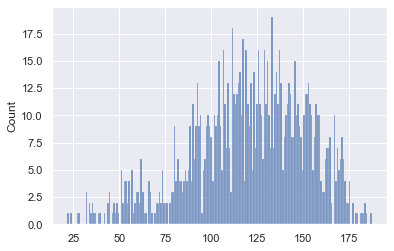

In [62]:
sns.set(font_scale=1)

sns.histplot(y_predict,bins=200)

In [60]:
pd.Series(y_predict, name='Yieled').to_csv('KernelTestCat.csv',  index_label=['NUM'] ,header=True)